# TỔNG QUAN

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
df = pd.read_csv('customer_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
852,8713-IGZSO,Male,0,No,No,2,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,24.85,62,No
6091,3097-NQYSN,Male,1,Yes,No,2,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Mailed check,86.85,156.35,Yes
4970,9795-VOWON,Male,0,No,No,7,No,No phone service,DSL,No,...,No,No,No,No,One year,Yes,Credit card (automatic),24.35,150.85,No
6193,5716-LIBJC,Female,0,No,Yes,13,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),104.15,1299.1,No
810,2239-JALAW,Male,0,No,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.25,6017.65,Yes


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [110]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [111]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [112]:
5174*100/df.shape[0] #Tính % tỷ lệ KH churn
#shape[0] là tổng số hàng

73.46301292063042

In [113]:
df.shape[0]

7043

Đầu tiên phải xoá cột customerID
    -> Lí do vì mỗi customerID là duy nhất, nếu khi chuyển đổi sang dữ liệu số để Machine Learning hiểu thì thì nó sẽ xuất hiện 7043 cột, tương ứng với mỗi hàng.

In [114]:
df = df.drop('customerID', axis='columns')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## - Giới thiệu dữ liệu: Đây là bộ dữ liệu khách hàng sử dụng dịch vụ của một công ty viễn thông.
    20 cột: gồm 2 cột int, 1 cột float, còn lại 18 cột là dạng chuỗi
### Các cột cần chú ý:
    gender: giới tính
    Partner: Tình trạng hôn nhân
    Dependents: Có người phụ thuộc (con cái) không
    SeniorCitizen: Khách hàng là người lớn tuổi hay không (Int)
    tenure: Số tháng khách hàng đã sử dụng dịch vụ (Int)
    PhoneService: Dịch vụ điện thoại
    MultipleLines: Có nhiều đường dây điện thoại: Yes/No/No phone Service
    InternetService: Loại dịch vụ khách hàng sử dụng: DSL/Fiber optic/No
    OnlineSecurity: Khách hàng có sử dụng dịch vụ bảo mật online không Yes/No/No internet service
    OnlineBackup: Khách hàng có sử dụng dịch vụ sao lưu dữ liệu online không (dịch vụ hỗ trợ)
    DeviceProtection: Dịch vụ bảo vệ thiết bị
    Téchupport: Dịch vụ hỗ trợ kỹ thuật
    StreamingTV: Dịch vụ truyền hình trực tuyến
    StreamingMovies: Xem phim trực tuyến
    Contract: Loại hợp đồng: Month-to-month, One year, Two year
    PaperlessBilling: Khách hàng có sử dụng hoá đơn điện tử không
    PaymentMethod: Phương thức thanh toán Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic)
    MonthlyCHarges: Cước phí hàng tháng (Float)
    TotalCharges: Tổng số tiền khách hàng đã thanh toán (Object)
    Churn: Khách hàng có sử dụng tiếp dịch vụ hay không ->> Biến mục tiêu

In [116]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [117]:
# Phát hiện nó là số nhưng datatype thì lại là dạng object, nên ta sẽ chuyển nó thành dạng số

# 1. MISSING VALUES

In [118]:
print('Các cột dữ liệu thiếu:')

df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]


Các cột dữ liệu thiếu:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [119]:
# Có 11 giá trị rỗng
missing_value = df[df.TotalCharges==' '].shape
missing_value

(11, 20)

In [120]:
# Đưa dữ liệu rỗng về NaN để dễ chuyển đổi
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
# Chuyển đôi dữ liệu sang dạng số
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [121]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [122]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Không còn cột dữ liệu nào thiếu

# 2. OUTLIERS

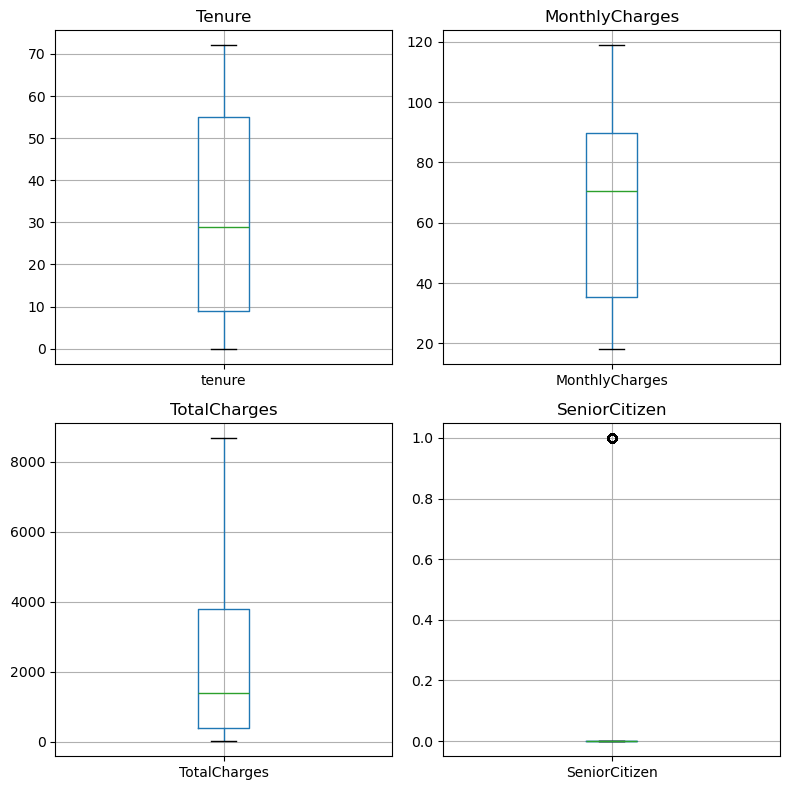

In [123]:
import matplotlib.pyplot as plt

# Vẽ boxplot để kiểm tra outliers
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

df[['tenure']].boxplot(ax=axes[0,0])
axes[0,0].set_title('Tenure')

df[['MonthlyCharges']].boxplot(ax=axes[0,1])
axes[0,1].set_title('MonthlyCharges')

df[['TotalCharges']].boxplot(ax=axes[1,0])
axes[1,0].set_title('TotalCharges')

df[['SeniorCitizen']].boxplot(ax=axes[1,1])
axes[1,1].set_title('SeniorCitizen')
plt.tight_layout()
plt.savefig('Outliers')
plt.show()


Rất ít outlier xuất hiện, tuy nhiên không quá nghiêm trọng, sẽ giữ nguyên vì để làm tránh mất mát dữ liệu

Tenure: Đa số khách hàng đều ở trong khoảng mức từ 10-60 tháng. Tuy nhiên, có một số khách chỉ sử dụng 1 tháng, hoặc trên mức 70 tháng. Không có outlier rõ ràng nào vượt qua mức thông thường. Cho thấy thời gian sử dụng dịch vụ này hoàn toàn hợp lý -> Không xử lý

MonthlyCharges: Có một số khách hàng sử dụng cước phí khá cao, lên đến gần 120, lệch khá xa so với dữ liệu trung bình vì khách hàng này sử dụng nhiều dịch vụ. Đây cũng không phải là điều xa lạ nên không cần xử lý. Vì điều này phản ánh mức độ sử dụng dịch vụ của khách hàng có chi tiêu nhiều.

TotalCharges: Ở Boxplot Total, dữ liệu đang chệch về một hướng khá cao, cụ thể có khách lên tới hơn 8000, nhưng điều này phản ánh KHÁCH HÀNG SỬ DỤNG DỊCH VỤ TRONG MỘT KHOẢNG THỜI GIAN LÂU DÀI. Nên không loại bỏ

SeniorCitizen: Không có outlier, chỉ có giá trị 1 và 0

# 3. KIỂM TRA PHÂN PHỐI DỮ LIỆU

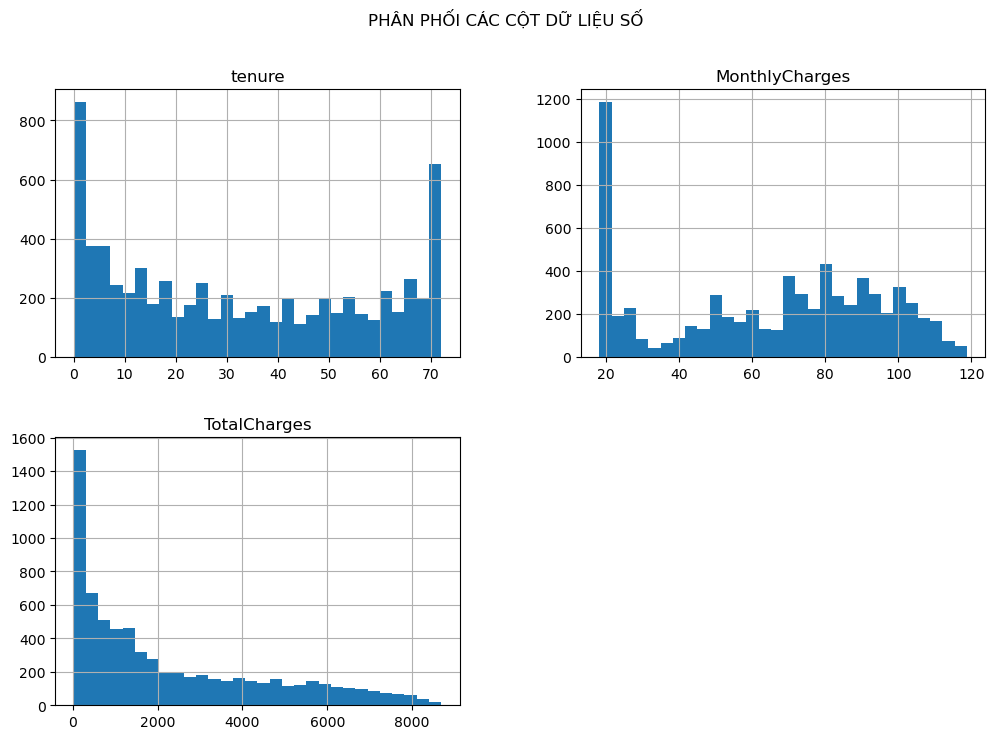

In [124]:
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_columns].hist(figsize=(12, 8), bins=30)
plt.suptitle('PHÂN PHỐI CÁC CỘT DỮ LIỆU SỐ')
plt.savefig('phan_phoi')

### Phân tích: 
####    1. tenure: Phân phối lệch về phía hai bên khá nhiều, bên trái lệnh hơn rõ. Bởi vì đây là những khách hàng mới, sẽ có xu hướng rời bỏ dịch vụ sớm. Vì có thể do đang đi tìm dịch vụ viễn thông tốt hơn.
            - Tuy nhiên: Càng về lâu về dài, cụ thể là ở hướng bên phải, vẫn có rất nhiều khách hàng sử dụng dịch vụ rất lâu (trên 70 tháng)
-> Ý nghĩa: Cần phát triển những chương trình để giữ chân khách hàng mới, có thể là tạo ưu đãi cho những khách hàng sử dụng lâu dài.
    
####    2. MonthlyCharges: Hơi lệch nhẹ, vì có một phần khách hàng có chi phí sử dụng dịch vụ cao hơn hẳn (100-120) 
-> Ý nghĩa: Điều này thể hiện khách hàng đang sử dụng nhiều gói dịch vụ cao cấp, hoặc các gói hỗ trợ đi kèm. Cần tập trung phát triển các gói dịch vụ. Sử dụng chiến lược bán chéo (cross-sell) và bán thêm (upsell)

 ####   3. TotalCharges: Phân phối lệch phải, thể hiện sự tích luỹ chi phí qua thời gian. Phần lớn khách hàng có tổng chi phí ở mức thấp, nhưng khá nhiều khách hàng lại cao hơn nhất nhiều. 
    Khá dốc ở phần đầu, vì khách hàng mới có tỷ lệ rời đi hơi cao nên tổng doanh thu còn thấp.
-> Ý nghĩa: Cần xác định nguyên nhân khách hàng rời bỏ dịch vụ sớm, để phục vụ cho việc cải thiện chất lượng dịch vụ, hoặc tạo nhiều chiến dịch dữ chân khách hàng.
    

# 4. CHUYỂN DỮ LIỆU VỀ DẠNG SỐ ĐỂ HUẤN LUYỆN
# VÀ MÃ HOÁ DỮ LIỆU ONE HOT ENCODING

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [126]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f' {column}: {df[column].unique()}')

In [127]:
print_unique_col_values(df)

 gender: ['Female' 'Male']
 Partner: ['Yes' 'No']
 Dependents: ['No' 'Yes']
 PhoneService: ['No' 'Yes']
 MultipleLines: ['No phone service' 'No' 'Yes']
 InternetService: ['DSL' 'Fiber optic' 'No']
 OnlineSecurity: ['No' 'Yes' 'No internet service']
 OnlineBackup: ['Yes' 'No' 'No internet service']
 DeviceProtection: ['No' 'Yes' 'No internet service']
 TechSupport: ['No' 'Yes' 'No internet service']
 StreamingTV: ['No' 'Yes' 'No internet service']
 StreamingMovies: ['No' 'Yes' 'No internet service']
 Contract: ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling: ['Yes' 'No']
 PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 Churn: ['No' 'Yes']


Ở CÁC CỘT CÓ NO PHONE SERVICE, NO INTERNET SERVICE. TA BIẾN NÓ THÀNH NO LUÔN BỞI VÌ NÓ CŨNG GIỐNG NHAU

In [128]:
df = df.replace('No internet service', 'No')
df = df.replace('No phone service', 'No')
# Biến đổi cột giới tính thành số
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})

In [129]:
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

gender: [1 0]
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']


In [130]:
#Biến đổi các cột có gái trị Yes/No thành 1 với 0
yes_no_columns = ['Partner', 'Dependents', 'PhoneService',
                  'MultipleLines','OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV',
                  'StreamingMovies', 'PaperlessBilling', 'Churn']
for col in yes_no_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [131]:
print(df[yes_no_columns].head())

   Partner  Dependents  PhoneService  MultipleLines  OnlineSecurity  \
0        1           0             0              0               0   
1        0           0             1              0               1   
2        0           0             1              0               1   
3        0           0             0              0               1   
4        0           0             1              0               0   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0             1                 0            0            0                0   
1             0                 1            0            0                0   
2             1                 0            0            0                0   
3             0                 1            1            0                0   
4             0                 0            0            0                0   

   PaperlessBilling  Churn  
0                 1      0  
1                 0      0  
2    

In [132]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


#### One hot encoding for categorical columns Ma hoa du lieu 
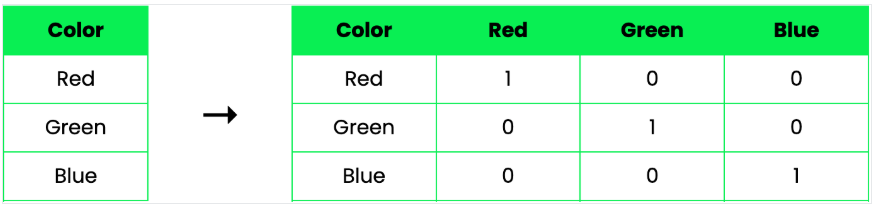

In [133]:
df = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [134]:
df = df.astype({col: 'int64' for col in df.select_dtypes(include=['bool']).columns})

In [135]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

# 5.ĐA CỘNG TUYẾN VIF

In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif_data

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,gender,1.002166
1,SeniorCitizen,1.155266
2,Partner,1.462763
3,Dependents,1.384904
4,tenure,7.422988
5,PhoneService,34.861885
6,MultipleLines,7.280106
7,OnlineSecurity,6.338893
8,OnlineBackup,6.783538
9,DeviceProtection,6.922533


In [137]:
df.drop(columns=['MonthlyCharges'],inplace=True)
vif_data = pd.DataFrame()
vif_data['Feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif_data

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,gender,1.002053
1,SeniorCitizen,1.155237
2,Partner,1.462360
3,Dependents,1.384854
4,tenure,7.410600
5,PhoneService,1.422246
6,MultipleLines,1.460228
7,OnlineSecurity,1.484349
8,OnlineBackup,1.476224
9,DeviceProtection,1.547606


In [138]:
df.drop(columns=['tenure'],inplace=True)
vif_data = pd.DataFrame()
vif_data['Feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif_data

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,gender,1.002052
1,SeniorCitizen,1.153770
2,Partner,1.444538
3,Dependents,1.384359
4,PhoneService,1.356894
5,MultipleLines,1.459774
6,OnlineSecurity,1.472109
7,OnlineBackup,1.466656
8,DeviceProtection,1.531389
9,TechSupport,1.517870


# 6.SCALE DATA CHUẨN HOÁ DỮ LIỆU
# FEATURE SCALLING

In [139]:
col_to_scale= ['TotalCharges']

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df[col_to_scale] = scale.fit_transform(df[col_to_scale])

In [140]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
TotalCharges: [-0.99424194 -0.17324413 -0.95967407 ... -0.85446945 -0.87206242
  2.01428802]
Churn: [0 1]
InternetService_DSL: [1 0]
InternetService_Fiber optic: [0 1]
InternetService_No: [0 1]
Contract_Month-to-month: [1 0]
Contract_One year: [0 1]
Contract_Two year: [0 1]
PaymentMethod_Bank transfer (automatic): [0 1]
PaymentMethod_Credit card (automatic): [0 1]
PaymentMethod_Electronic check: [1 0]
PaymentMethod_Mailed check: [0 1]


# 7.SPLITTING CHIA TRAIN/TEST ĐỂ HUẤN LUYỆN

In [71]:
x = df.drop('Churn', axis='columns')
y = test = df.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

# 8.MACHINE LEARNING LOGISTIC REGRESSION

In [72]:
model = LogisticRegression(random_state=42)

model.fit(x_train, y_train)
accua = model.score(x_test, y_test)
print("Accuracy", accua, "\n")

y_pred = model.predict(x_test)
print("preds", y_pred[:5], "\n")

cl_rep = classification_report(y_test, y_pred)
print(cl_rep)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix, y_pred

Accuracy 0.8197303051809794 

preds [1. 0. 0. 1. 0.] 

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1036
         1.0       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.76      1409
weighted avg       0.81      0.82      0.81      1409



(array([[937,  99],
        [155, 218]], dtype=int64),
 array([1., 0., 0., ..., 0., 0., 0.], dtype=float32))

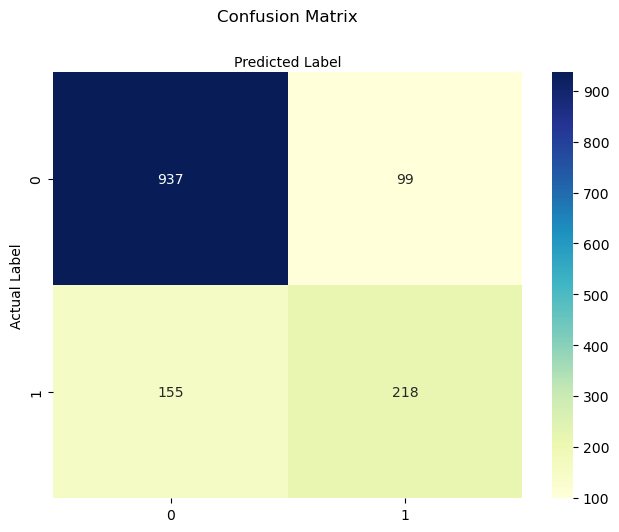

In [73]:
import seaborn as sns

cnf_matrix = confusion_matrix(y_test, y_pred)
class_labels = [0, 1]  # Tên các nhãn lớp (có thể tùy chỉnh theo bài toán)
fig, ax = plt.subplots()
tick_positions = np.arange(len(class_labels))  # Vị trí các nhãn trục
plt.xticks(tick_positions, class_labels)
plt.yticks(tick_positions, class_labels)

# Tạo Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")  # Đặt nhãn trục x ở trên cùng
plt.tight_layout()  # Căn chỉnh đồ thị gọn gàng
plt.title('Confusion Matrix', y=1.1)  # Tiêu đề
plt.ylabel('Actual Label')  # Nhãn trục y
plt.xlabel('Predicted Label')  # Nhãn trục x
plt.show()

Accuracy: 0.7792760823278921 

Predictions: [1. 0. 0. 0. 0.] 

              precision    recall  f1-score   support

         0.0       0.87      0.82      0.85      1036
         1.0       0.57      0.65      0.61       373

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



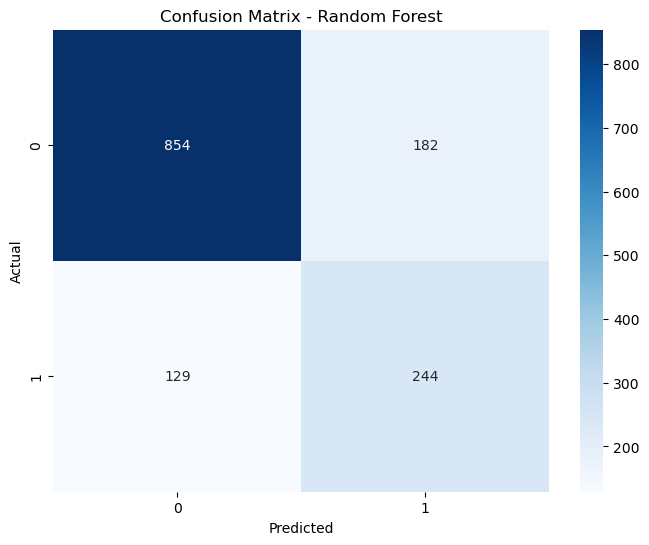

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Cân bằng dữ liệu bằng SMOTE
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Huấn luyện mô hình Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình
model.fit(x_train_balanced, y_train_balanced)
accua = model.score(x_test, y_test)
print("Accuracy:", accua, "\n")

# Dự đoán trên tập test
y_pred = model.predict(x_test)
print("Predictions:", y_pred[:5], "\n")

# Báo cáo hiệu suất
cl_rep = classification_report(y_test, y_pred)
print(cl_rep)

# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Vẽ biểu đồ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
